In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [49]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [52]:
data_cat = data.select_dtypes('object')

In [56]:
data_num = data.drop(data_cat,axis=1)

In [58]:
from sklearn.preprocessing import LabelEncoder

In [60]:
le = LabelEncoder()

In [62]:
for col in data_cat:
    data_cat[col] = le.fit_transform(data_cat[col])

In [64]:
data_cat.head()

,sex,smoker,region
0,0,1,3
1,1,0,2
2,1,0,2
3,1,0,1
4,1,0,1


In [66]:
data = pd.concat([data_num,data_cat],axis=1)

In [68]:
data.head()

,age,bmi,children,charges,sex,smoker,region
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1


In [74]:
x = data.drop(['charges','region'],axis=1)
x.head()

,age,bmi,children,sex,smoker
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0


In [76]:
y = data.charges
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [80]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size= 0.3, random_state=42)

In [82]:
xtrain.shape

(936, 5)

In [84]:
xtest.shape

(402, 5)

In [86]:
from sklearn.linear_model import LinearRegression

In [88]:
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [96]:
ypred= model.predict(xtest)

In [104]:
model.score(xtrain,ytrain)

0.7413880155089706

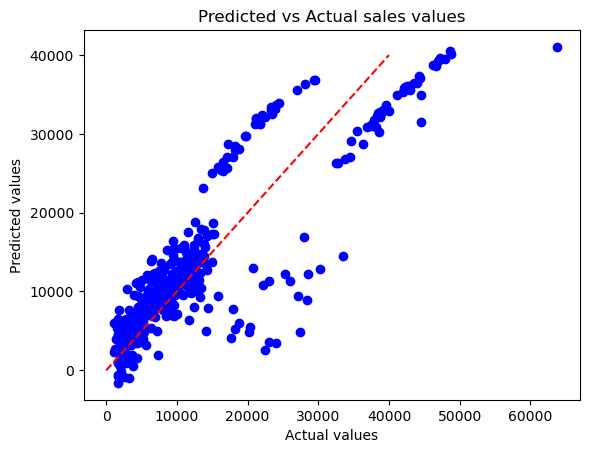

In [100]:
plt.scatter(ytest,ypred,color='blue')
plt.plot([0,40000],[0,40000],color='red',linestyle='--')
plt.title('Predicted vs Actual sales values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()        

In [106]:
import joblib

In [108]:
joblib.dump(model,'helth_insurence_model.pkl')

['helth_insurence_model.pkl']

In [118]:
model.predict([[50,30.900,1,1,1]])

C:\Users\somna\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([35045.53803226])